# Working With Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# configure matplotlib output
import matplotlib as mpl
mpl.style.use('config/clean.mplstyle') # this loads my personal plotting settings
%matplotlib inline

In [3]:
# if you have an HD display
%config InlineBackend.figure_format = 'retina'

In [4]:
# some warnings can get annoying
import warnings
warnings.filterwarnings('ignore')

# Pandas!

## DataFrame

In [5]:
s = pd.Series(np.random.rand(10), index=np.arange(10, 20))
s

10    0.527892
11    0.813453
12    0.832054
13    0.256279
14    0.052254
15    0.921486
16    0.491431
17    0.845195
18    0.736552
19    0.458688
dtype: float64

In [6]:
print(s.index)
print(s.values)

Int64Index([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')
[0.52789167 0.81345347 0.83205421 0.25627927 0.05225371 0.92148623
 0.4914312  0.845195   0.73655237 0.45868813]


In [7]:
s.describe()

count    10.000000
mean      0.593529
std       0.286015
min       0.052254
25%       0.466874
50%       0.632222
75%       0.827404
max       0.921486
dtype: float64

In [8]:
df = pd.DataFrame({'ser1': s, 'ser2': np.random.randn(10)})
df.head()

,ser1,ser2
10,0.527892,0.140299
11,0.813453,2.904520
12,0.832054,-0.299701
13,0.256279,0.017643
14,0.052254,-1.498773


In [9]:
df.describe()

,ser1,ser2
count,10.000000,10.000000
mean,0.593529,-0.022561
std,0.286015,1.489102
min,0.052254,-2.629333
25%,0.466874,-0.616841
50%,0.632222,0.078971
75%,0.827404,0.337916
max,0.921486,2.904520


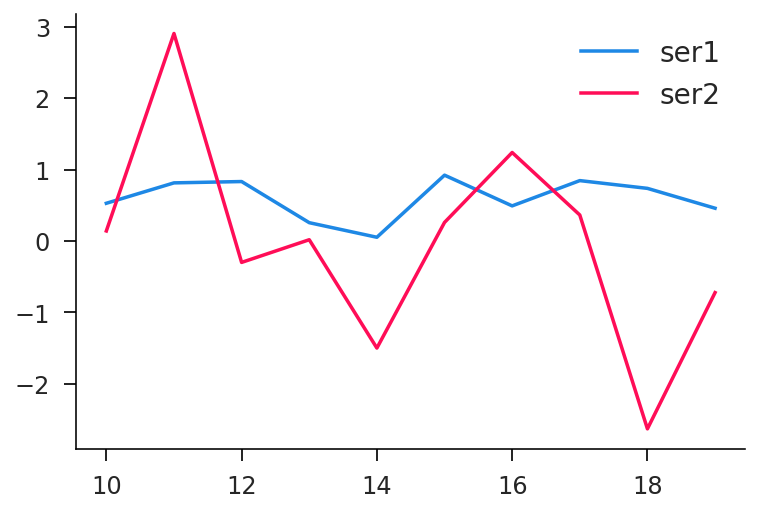

In [10]:
df.plot();

In [11]:
df['ser1']

10    0.527892
11    0.813453
12    0.832054
13    0.256279
14    0.052254
15    0.921486
16    0.491431
17    0.845195
18    0.736552
19    0.458688
Name: ser1, dtype: float64

In [12]:
df['ser1'] > 0.5

10     True
11     True
12     True
13    False
14    False
15     True
16    False
17     True
18     True
19    False
Name: ser1, dtype: bool

In [13]:
df1 = df[df['ser1']>0.5]
df1

,ser1,ser2
10,0.527892,0.140299
11,0.813453,2.904520
12,0.832054,-0.299701
15,0.921486,0.259699
17,0.845195,0.363988
18,0.736552,-2.629333


In [14]:
df.query('ser1 > 0.5')

,ser1,ser2
10,0.527892,0.140299
11,0.813453,2.904520
12,0.832054,-0.299701
15,0.921486,0.259699
17,0.845195,0.363988
18,0.736552,-2.629333


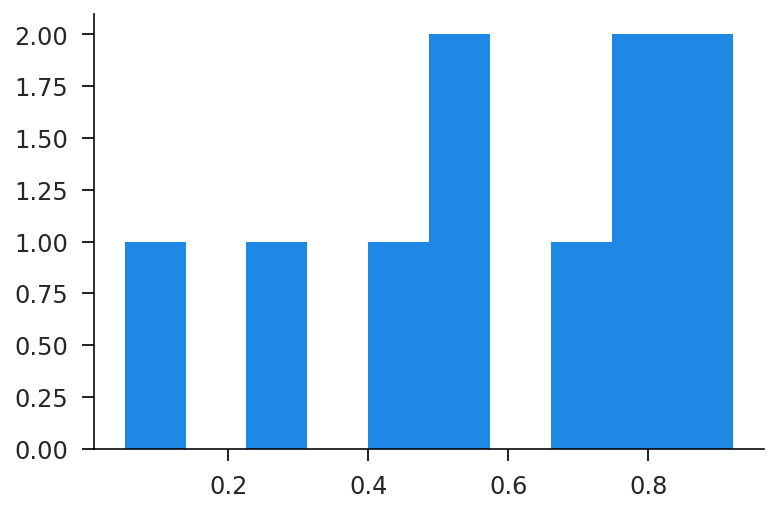

In [15]:
df['ser1'].hist(grid=False);

## Grouping Data

In [16]:
# make some fake data
N = 100
block = np.random.randint(4, size=N)
cmean = np.array([0.1, 0.2, 0.3, 0.4])
cvars = np.array([0.2, 0.1, 0.5, 0.2])
value = cmean[block]+np.random.randn(N)*cvars[block]
df = pd.DataFrame({
    'block': block,
    'value': value
})

In [17]:
df.head(10)

,block,value
0,1,0.071552
1,0,-0.099211
2,3,0.400101
3,3,0.099281
4,3,0.657213
5,3,0.431656
6,3,0.650351
7,0,0.389047
8,0,0.148246
9,1,0.431895


In [18]:
df.groupby('block').size()

block
0    23
1    23
2    21
3    33
dtype: int64

In [19]:
df.groupby('block')['value'].mean()

block
0    0.106225
1    0.184189
2    0.285226
3    0.418954
Name: value, dtype: float64

In [20]:
df.groupby('block')['value'].std()

block
0    0.171538
1    0.127809
2    0.554142
3    0.196554
Name: value, dtype: float64

In [21]:
df.groupby('block')['value'].apply(lambda x: np.mean(np.abs(x-np.mean(x))))

block
0    0.135224
1    0.105488
2    0.437153
3    0.150440
Name: value, dtype: float64

In [22]:
grp = df.groupby('block')['value']
pd.DataFrame({
    'mean': grp.mean(),
    'stdv': grp.std(),
    'absd': grp.apply(lambda x: np.mean(np.abs(x-np.mean(x))))
})

,mean,stdv,absd
block,,,
0,0.106225,0.171538,0.135224
1,0.184189,0.127809,0.105488
2,0.285226,0.554142,0.437153
3,0.418954,0.196554,0.150440


## Time Series

In [23]:
ret = 0.05 # yearly return
vol = 0.1 # yearly volatility

In [24]:
days = pd.date_range('2016-01-01', '2016-12-31', freq='D')
N = len(days)
T = (days.max()-days.min()).days/365.25
delt = T/N

In [25]:
vals = vol*np.sqrt(delt)*np.cumsum(np.random.randn(N))
df = pd.DataFrame({
    'date': days,
    'price': vals
}).set_index('date')
df.head()

,price
date,
2016-01-01,0.007793
2016-01-02,0.006274
2016-01-03,0.006088
2016-01-04,0.006761
2016-01-05,0.000825


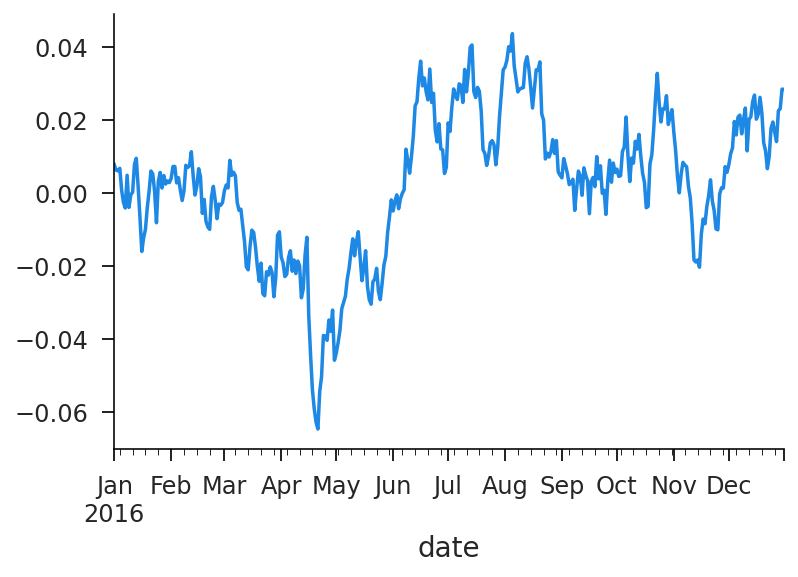

In [26]:
df['price'].plot();

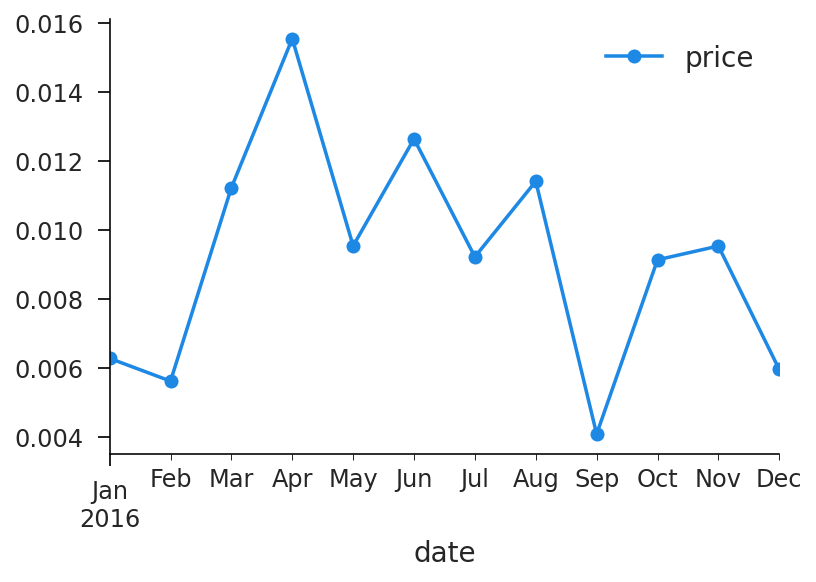

In [27]:
df.groupby(pd.Grouper(freq='MS')).std().plot(marker='o');

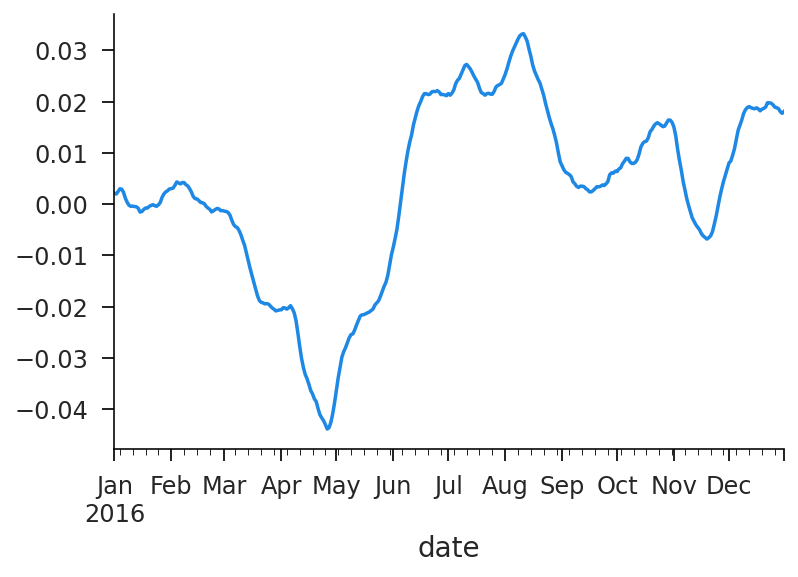

In [28]:
df.rolling(20, center=True, min_periods=5).mean().plot(legend=False);

## Transforming

In [29]:
ret = 0.05 # yearly return
vol = 0.1 # yearly volatility

In [30]:
days = pd.date_range('2006-01-01', '2016-12-31', freq='D')
N = len(days)
T = (days.max()-days.min()).days/365.25
delt = T/N

In [31]:
vals = vol*np.sqrt(delt)*np.cumsum(np.random.randn(len(days)))
df = pd.DataFrame({
    'date': days,
    'price': vals
}).set_index('date')

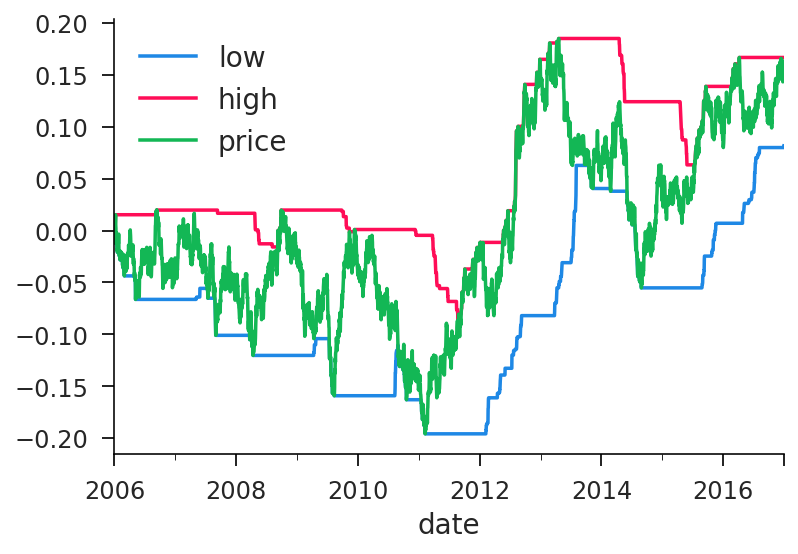

In [32]:
roll = df['price'].rolling(52*7, min_periods=1)
pd.DataFrame({
    'low' : roll.min(),
    'high': roll.max(),
    'price': df['price']
}).plot();

## Plotting

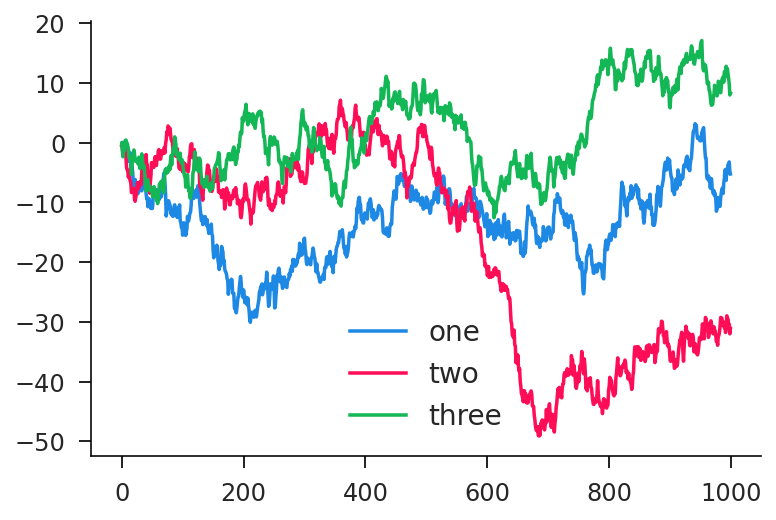

In [33]:
# good way to arrange plots
pd.DataFrame({
    'one': np.cumsum(np.random.randn(1000)),
    'two': np.cumsum(np.random.randn(1000)),
    'three': np.cumsum(np.random.randn(1000))
}).plot();

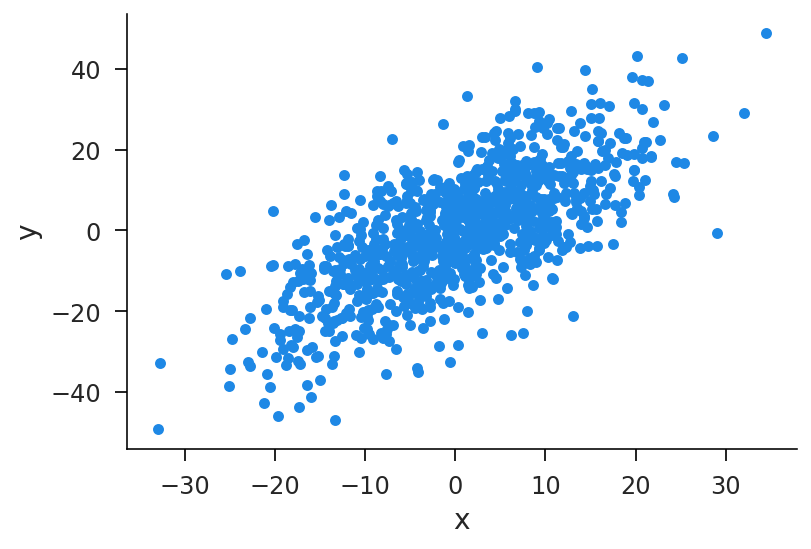

In [34]:
x = 10*np.random.randn(1000)
y = x + 10*np.random.randn(1000)
df = pd.DataFrame({
    'x': x,
    'y': y
})
df.plot.scatter(x='x', y='y');

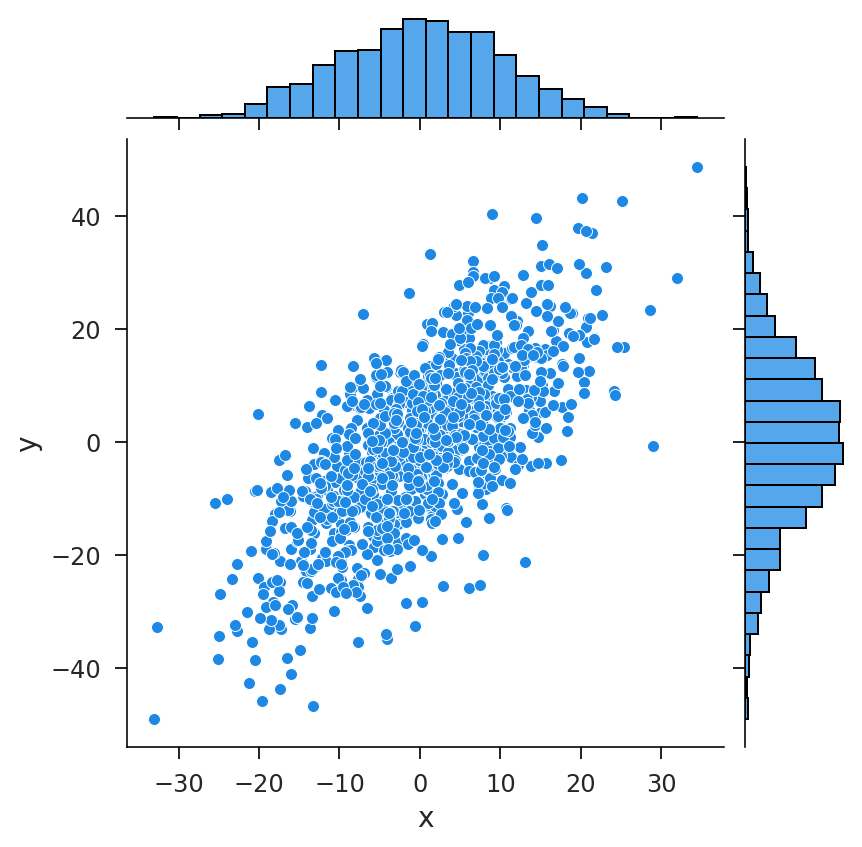

In [37]:
sns.jointplot(x='x', y='y', data=df);

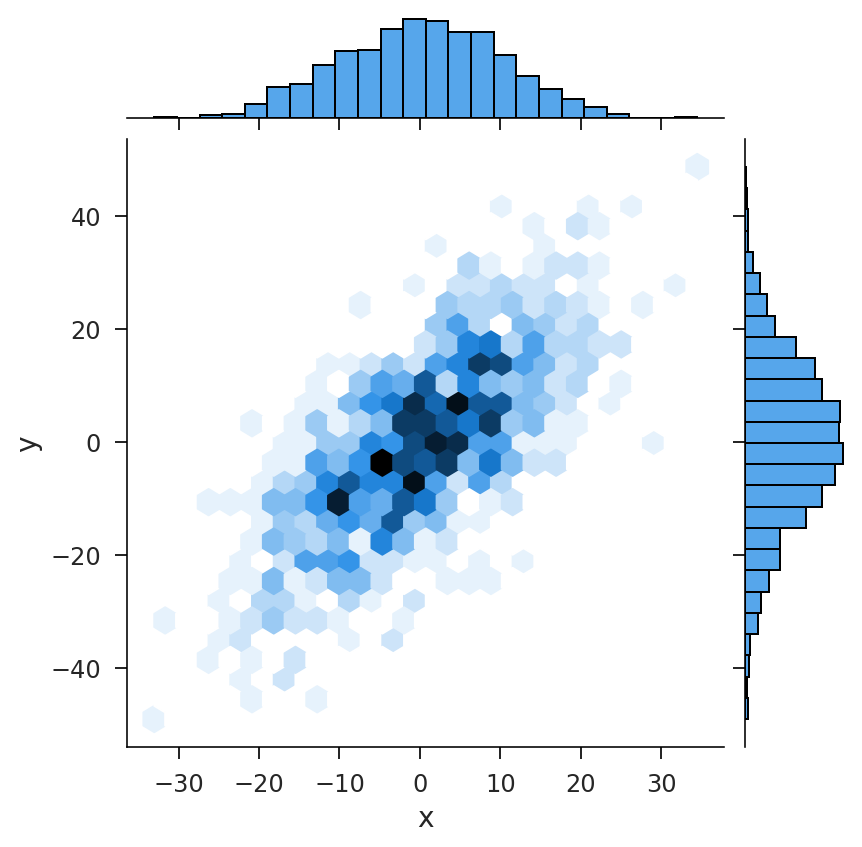

In [39]:
# kind in ['scatter', 'reg', 'resid', 'kde', 'hex']
sns.jointplot(x='x', y='y', kind='hex', data=df);

## Indexing

In [40]:
df = pd.DataFrame({
    'a': np.arange(10),
    'b': np.random.rand(10)
}, index=np.arange(10, 20))
df

,a,b
10,0,0.002700
11,1,0.062203
12,2,0.743994
13,3,0.389042
14,4,0.629168
15,5,0.667163
16,6,0.364605
17,7,0.872498
18,8,0.446051
19,9,0.304202


In [41]:
# slicing on index
df.loc[14]

a    4.000000
b    0.629168
Name: 14, dtype: float64

In [42]:
# slicing on location
df.iloc[4]

a    4.000000
b    0.629168
Name: 14, dtype: float64

In [43]:
# slicing on column
df['a']

10    0
11    1
12    2
13    3
14    4
15    5
16    6
17    7
18    8
19    9
Name: a, dtype: int64

In [44]:
# selecting
df[df['a']>5]

,a,b
16,6,0.364605
17,7,0.872498
18,8,0.446051
19,9,0.304202


In [45]:
# advanced selecting
df[(df['a']>3)&(df['a']<8)]

,a,b
14,4,0.629168
15,5,0.667163
16,6,0.364605
17,7,0.872498


In [46]:
# selection mechanism
df['a'] > 3

10    False
11    False
12    False
13    False
14     True
15     True
16     True
17     True
18     True
19     True
Name: a, dtype: bool

In [47]:
# querying
df.query('a > 3 and a < 8')

,a,b
14,4,0.629168
15,5,0.667163
16,6,0.364605
17,7,0.872498


## Joining

In [48]:
mapp = pd.Series({x: 2*x for x in range(10)}, name='twox')
mapp

0     0
1     2
2     4
3     6
4     8
5    10
6    12
7    14
8    16
9    18
Name: twox, dtype: int64

In [49]:
init = pd.DataFrame({
    'ser': np.random.randint(10, size=100),
    'val': np.random.rand(100)
})
init.head()

,ser,val
0,1,0.375417
1,0,0.401198
2,3,0.475139
3,3,0.179667
4,1,0.347984


In [50]:
final = init.join(mapp, on='ser')
final.head()

,ser,val,twox
0,1,0.375417,2
1,0,0.401198,0
2,3,0.475139,6
3,3,0.179667,6
4,1,0.347984,2


In [51]:
final['check'] = final['twox'] == 2*final['ser']
final.head()

,ser,val,twox,check
0,1,0.375417,2,True
1,0,0.401198,0,True
2,3,0.475139,6,True
3,3,0.179667,6,True
4,1,0.347984,2,True


In [52]:
print(final['check'].all())

True


### Stack and unstack (and some pivot)

In [53]:
a = [0, 1, 2]
b = [1, 2, 3]
list(zip(a, b))

[(0, 1), (1, 2), (2, 3)]

In [54]:
# this constructs a family structure table
M, N = 5, 12
from itertools import cycle
cmap = list(zip(cycle(range(M)), range(100, 100+N), np.random.rand(N)))
pmap = pd.DataFrame(cmap, columns=['pid', 'cid', 'income'])
pmap = pmap.sort_values('pid').reset_index(drop=True)
pmap

,pid,cid,income
0,0,100,0.066585
1,0,105,0.037036
2,0,110,0.100800
3,1,101,0.101773
4,1,106,0.609407
5,1,111,0.795613
6,2,102,0.304533
7,2,107,0.352258
8,3,103,0.297334
9,3,108,0.123106


In [55]:
# tabulate the order of each child
pmap['order'] = pmap.groupby('pid').cumcount().apply(lambda x: f'child{x}')
ptab = pmap.set_index(['pid', 'order'])
ptab

cid    income
pid order                
0   child0  100  0.066585
    child1  105  0.037036
    child2  110  0.100800
1   child0  101  0.101773
    child1  106  0.609407
    child2  111  0.795613
2   child0  102  0.304533
    child1  107  0.352258
3   child0  103  0.297334
    child1  108  0.123106
4   child0  104  0.955254
    child1  109  0.235316

In [56]:
fam = ptab.unstack(level=1)
fam

cid                  income                    
order child0 child1 child2    child0    child1    child2
pid                                                     
0      100.0  105.0  110.0  0.066585  0.037036  0.100800
1      101.0  106.0  111.0  0.101773  0.609407  0.795613
2      102.0  107.0    NaN  0.304533  0.352258       NaN
3      103.0  108.0    NaN  0.297334  0.123106       NaN
4      104.0  109.0    NaN  0.955254  0.235316       NaN

In [57]:
# the reverse operation gives us (almost) what we started with
fam.stack(level='order')

cid    income
pid order                  
0   child0  100.0  0.066585
    child1  105.0  0.037036
    child2  110.0  0.100800
1   child0  101.0  0.101773
    child1  106.0  0.609407
    child2  111.0  0.795613
2   child0  102.0  0.304533
    child1  107.0  0.352258
3   child0  103.0  0.297334
    child1  108.0  0.123106
4   child0  104.0  0.955254
    child1  109.0  0.235316

In [58]:
# we can do this with pivot too
ptab.reset_index().pivot('pid', 'order', ['cid', 'income'])

cid                  income                    
order child0 child1 child2    child0    child1    child2
pid                                                     
0      100.0  105.0  110.0  0.066585  0.037036  0.100800
1      101.0  106.0  111.0  0.101773  0.609407  0.795613
2      102.0  107.0    NaN  0.304533  0.352258       NaN
3      103.0  108.0    NaN  0.297334  0.123106       NaN
4      104.0  109.0    NaN  0.955254  0.235316       NaN

## Networks

In [59]:
import networkx as nx

In [60]:
df = pd.DataFrame({
    'src': np.random.randint(10, size=20),
    'dst': np.random.randint(10, size=20),
    'wgt': np.random.exponential(size=20)
})
df = df.drop_duplicates(subset=['src', 'dst'])
df = df.query('src != dst')
df.head()

,src,dst,wgt
0,2,8,0.213093
1,9,0,0.670581
2,1,0,1.283841
3,4,9,0.208977
4,2,4,0.345848


In [61]:
G = nx.Graph()
G.add_nodes_from(np.arange(10))
G.add_weighted_edges_from([(x['src'], x['dst'], x['wgt']) for i, x in df.iterrows()])
# G.add_weighted_edges_from(df[['src', 'dst', 'wgt']].values) # equivalent
G

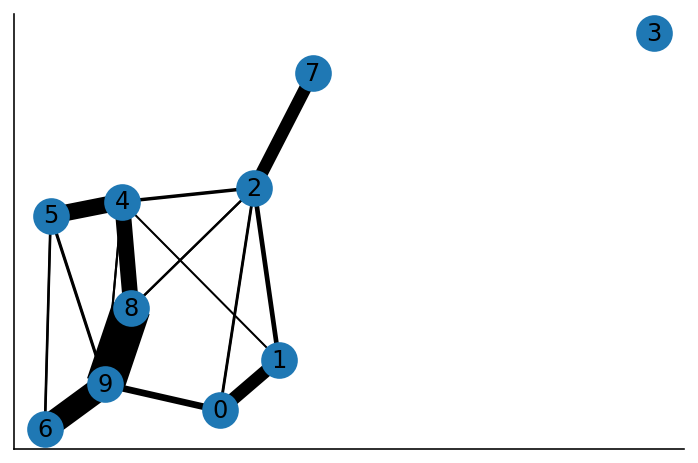

In [62]:
edgewidth = [5*d['weight'] for (u,v,d) in G.edges(data=True)]
pos = nx.spring_layout(G, iterations=50)
nx.draw_networkx(G, pos);
nx.draw_networkx_edges(G, pos, width=edgewidth);

In [63]:
nx.centrality.eigenvector.eigenvector_centrality(G, weight='weight')

{0: 0.10120165578228416,
 1: 0.03779870290664048,
 2: 0.06057633070227467,
 3: 1.0180727937253825e-19,
 4: 0.2721065927096299,
 5: 0.14883261759218142,
 6: 0.3205171174600646,
 7: 0.01528757553207264,
 8: 0.5984261700781001,
 9: 0.6537492115818285}

## Input/Output

In [64]:
df = pd.DataFrame({
    'one': np.cumsum(np.random.randn(1000)),
    'two': np.cumsum(np.random.randn(1000)),
    'three': np.cumsum(np.random.randn(1000))
})
df.to_csv('output/series.csv', index=False)

In [65]:
!head output/series.csv

one,two,three
-0.5421654083632153,-0.9744638343057059,-0.18638171026449546
0.12859476846579576,1.1624123378813613,1.2204003740466889
-1.2205691594081507,1.8263605292743677,2.272481384593045
-0.689569434635938,1.4191315456811626,3.446352535602742
1.3206202782770866,3.048415396646404,3.803517708243492
1.890321781140268,3.1280195857021322,2.503545317707457
1.213592322630003,4.114518329075737,3.4192199539051495
-0.7855709073674961,3.5540650153212257,2.52842209526325
1.4337906360975126,3.4458508728622084,2.0412862802329172


In [66]:
df = pd.read_csv('output/series.csv')
df.head()

,one,two,three
0,-0.542165,-0.974464,-0.186382
1,0.128595,1.162412,1.220400
2,-1.220569,1.826361,2.272481
3,-0.689569,1.419132,3.446353
4,1.320620,3.048415,3.803518


Can also use the many `pd.DataFrame.to_*` and `pd.read_*` function where `*` is one of:
- csv
- excel
- parquet
- json
- html
- latex
- stata
- sql

Parquet is relatively new and interesting! It is fast but not as heavy as SQL, but it also doesn't suffer from the same typing issues that CSV sometimes does.

## External Data

In [67]:
import pandas_datareader as pdr

In [68]:
emp = pdr.fred.FredReader(['UNRATE', 'LNS12300060'], start='1948-01-01').read()
emp = emp.rename(columns={'UNRATE': 'unemp', 'LNS12300060': 'empop'}).rename_axis('date')
emp.head()

,unemp,empop
date,,
1948-01-01,3.4,62.6
1948-02-01,3.8,62.7
1948-03-01,4.0,62.6
1948-04-01,3.9,62.9
1948-05-01,3.5,62.5


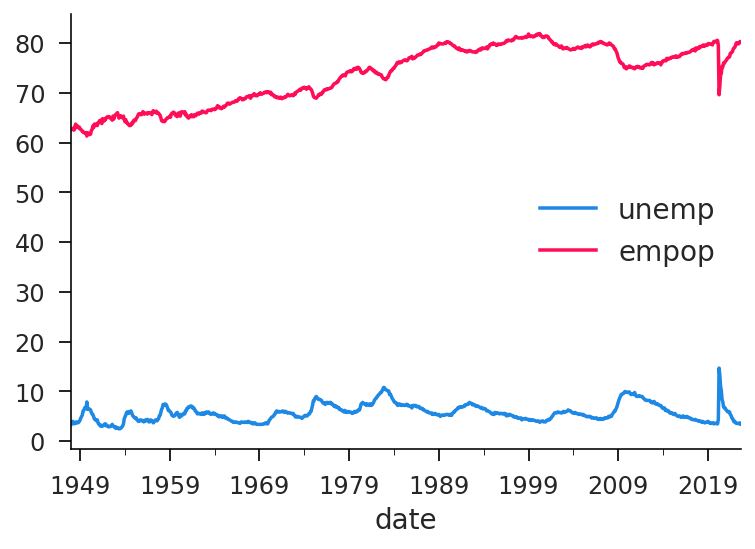

In [69]:
emp.plot();

In [70]:
# detrender
def detrend(s):
    name = s.name
    df = s.reset_index()
    df['year'] = df['date'].dt.year
    ret = smf.ols(f'{name} ~ 1 + year', data=df.reset_index()).fit()
    pred = pd.Series(ret.predict(), index=s.index)
    return s - pred

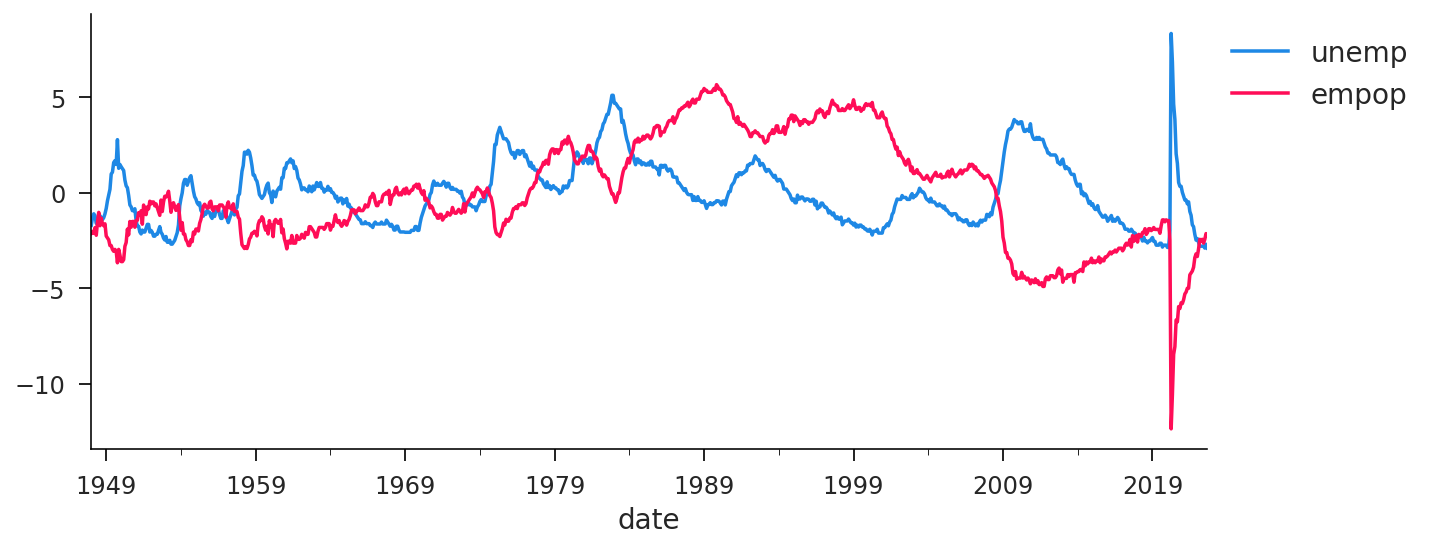

In [71]:
emp.apply(detrend).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

In [72]:
# detrend poly!
def detrendn(s, deg=1):
    name = s.name
    df = s.reset_index()
    df['year'] = df['date'].dt.year
    df['zyear'] = df['year'] - df['year'].min()
    reg = []
    for n in range(deg+1):
        ds = f'year{n}'
        df[ds] = df['zyear']**n
        reg.append(ds)
    reg = f'{name} ~ ' + ' + '.join(reg)
    ret = smf.ols(reg, data=df).fit()
    pred = pd.Series(ret.predict(), index=s.index)
    return s - pred

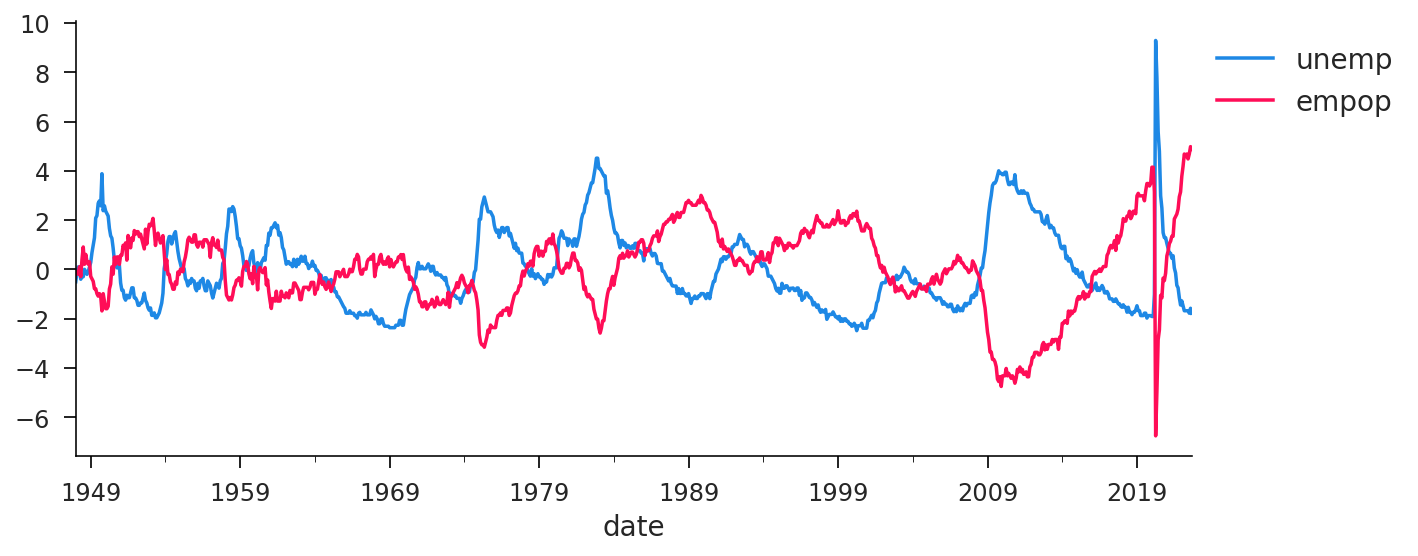

In [73]:
emp.apply(lambda s: detrendn(s, deg=3)).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

In [74]:
# let's not reinvent the wheel
def detrendn1(s, deg=1):
    year = s.index.year
    zyear = year - year.min()
    coef = np.polyfit(zyear, s, deg)
    vals = np.polyval(coef, zyear)
    pred = pd.Series(vals, index=s.index, name=s.name)
    return s - pred

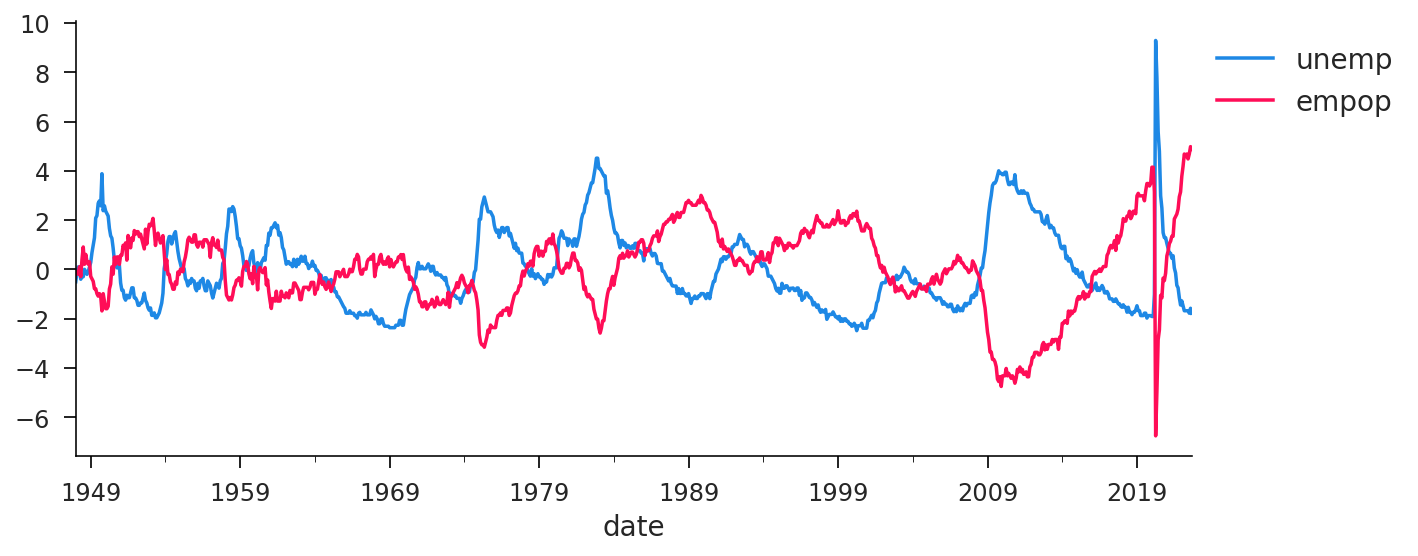

In [75]:
emp.apply(lambda s: detrendn1(s, deg=3)).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

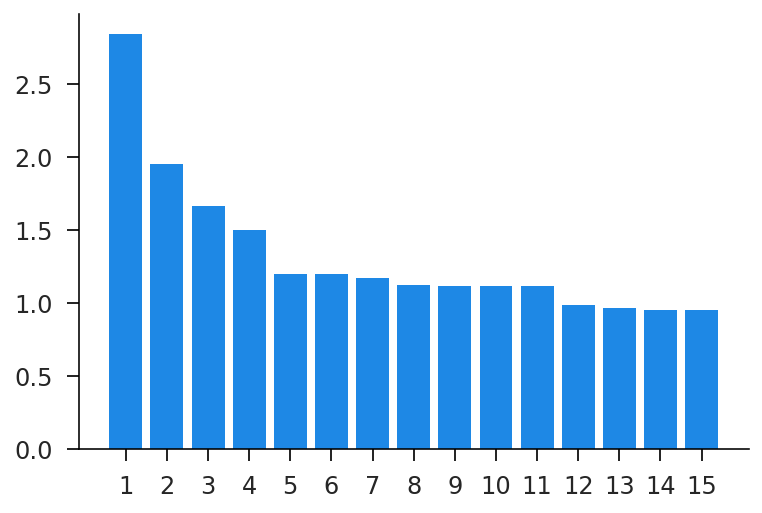

In [76]:
dvec = np.arange(1, 15+1)
plt.bar(dvec, [np.std(detrendn1(emp['empop'], deg=d)) for d in dvec]);
plt.xticks(dvec);

# Regressions

In [77]:
import statsmodels.formula.api as smf

## Basic

In [78]:
N = 100
x = np.random.randn(N)
y = 3*np.random.randn(N)
z = 1 + 2*x + 3*y + 4*x*y + np.random.randn(N)
df0 = pd.DataFrame({
    'x': x,
    'y': y,
    'z': z
})

In [79]:
ret = smf.ols('z ~ 1 + x + y', data=df0).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     24.98
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           1.78e-09
Time:                        22:41:16   Log-Likelihood:                -406.80
No. Observations:                 100   AIC:                             819.6
Df Residuals:                      97   BIC:                             827.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2931      1.456      1.575      0.119      -0.597       5.183
x             -0.6434      1.339     -0.481      0.632      -3.300       2.013
y              3.0512      0.432      7.067      0.000       2.194       3.908
==============================================================================
Omnibus:                       11.134   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               30.316
Skew:                           0.110   Prob(JB):                     2.61e-07
Kurtosis:                       5.688   Cond. No.                         3.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
ret.params

Intercept    2.293139
x           -0.643387
y            3.051170
dtype: float64

In [81]:
ret = smf.ols('z ~ 1 + x*y', data=df0).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.073e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          4.17e-121
Time:                        22:41:16   Log-Likelihood:                -136.68
No. Observations:                 100   AIC:                             281.4
Df Residuals:                      96   BIC:                             291.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1381      0.099     11.545      0.000       0.942       1.334
x              1.9846      0.092     21.545      0.000       1.802       2.167
y              3.0604      0.029    105.047      0.000       3.003       3.118
x:y            4.0181      0.028    145.629      0.000       3.963       4.073
==============================================================================
Omnibus:                        0.530   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.679
Skew:                          -0.126   Prob(JB):                        0.712
Kurtosis:                       2.684   Cond. No.                         3.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

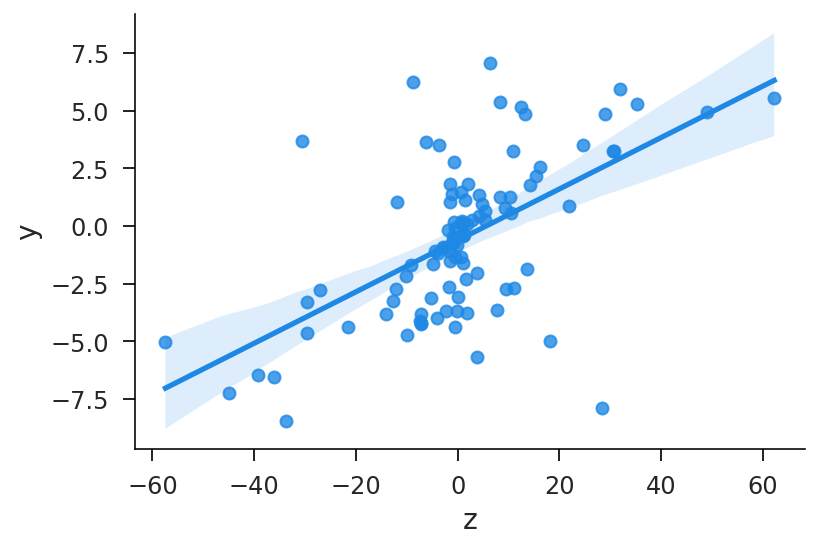

In [83]:
sns.regplot(x='z', y='y', data=df0);

## Categorical

In [84]:
import fastreg as fr
from fastreg import I, R, C

In [85]:
# make some fake data
N = 100
block = np.random.randint(4, size=N)
cmean = np.array([0.1, 0.2, 0.3, 0.4])
cvars = np.array([0.2, 0.1, 0.5, 0.2])
value = cmean[block] + np.random.randn(N)*cvars[block]
df1 = pd.DataFrame({
    'block': block,
    'value': value
})

In [93]:
fr.ols(y=R.z, x=I+R.x+R.y, data=df0)

z,coeff,stderr,low95,high95,pvalue
I,2.293139,1.456172,-0.560905,5.147182,1.153090e-01
x,-0.643387,1.338665,-3.267121,1.980347,6.307876e-01
y,3.051170,0.431756,2.204943,3.897397,1.584510e-12


In [94]:
fr.ols(y=R.z, x=I+R.x+R.y+R.x*R.y, data=df0)

z,coeff,stderr,low95,high95,pvalue
I,1.138062,0.098578,0.944852,1.331272,0.0
x,1.984648,0.092115,1.804107,2.165190,0.0
y,3.060414,0.029134,3.003313,3.117516,0.0
x*y,4.018141,0.027592,3.964062,4.072220,0.0


In [95]:
fr.ols(y=R.value, x=I+C.block, data=df1)

value,coeff,stderr,low95,high95,pvalue
I,0.092493,0.064154,-0.033247,0.218234,0.149378
block=1,0.113453,0.093410,-0.069628,0.296534,0.224531
block=2,0.171165,0.095532,-0.016074,0.358404,0.073180
block=3,0.302553,0.094433,0.117468,0.487638,0.001356


## Bootstrapping

In [96]:
from sklearn.utils import resample

In [97]:
def gen_block_data(N, cmean, cvars):
    cmean = np.array(cmean)
    cvars = np.array(cvars)
    block = np.random.randint(len(cmean), size=N)
    value = cmean[block] + np.random.randn(N)*cvars[block]
    return pd.DataFrame({
        'block': block,
        'value': value
    })

In [103]:
N = 100
K = 1000
cmean = [0.1, 0.2, 0.3, 0.4]
cvars = [0.2, 0.1, 0.5, 0.2]
mygen = lambda: gen_block_data(N, cmean, cvars)
myy, myx = R.value, C.block(drop=fr.NONE)
data0 = mygen()
mysamp = lambda: resample(data0)

In [125]:
res = fr.ols(y=myy, x=myx, data=data0)
stderr_reg = res['stderr']

In [126]:
res = fr.ols(y=myy, x=myx, data=data0, stderr='hc3')
stderr_rob = res['stderr']

In [127]:
res = pd.DataFrame({i: fr.ols(y=myy, x=myx, data=mygen())['coeff'] for i in range(K)}).T
stderr_bsp0 = res.std()

In [128]:
res = pd.DataFrame({i: fr.ols(y=myy, x=myx, data=mysamp())['coeff'] for i in range(K)}).T
stderr_bsp = res.std()

In [129]:
pd.DataFrame({
    'stderr_reg': stderr_reg,
    'stderr_rob': stderr_rob,
    'stderr_bsp0': stderr_bsp0,
    'stderr_bsp': stderr_bsp
}).T

,block=0,block=1,block=2,block=3
stderr_reg,0.050915,0.050915,0.055775,0.044094
stderr_rob,0.048880,0.016868,0.093020,0.038640
stderr_bsp0,0.038966,0.020093,0.099543,0.041126
stderr_bsp,0.047376,0.016103,0.090133,0.036207


## MAPS

In [131]:
import geopandas as gpd
from ipywidgets import interact, IntSlider

In [132]:
pref_hist = gpd.read_file('/media/totoro/data/china_maps/history/v6_time_pref_pgn_utf_wgs84.shp')
pref_hist = pref_hist.rename(columns={
    'NAME_CH': 'name_zh',
    'NAME_PY': 'name_en',
    'BEG_YR': 'beg_yr',
    'END_YR': 'end_yr'
})[['name_zh', 'name_en', 'beg_yr', 'end_yr', 'geometry']]
print(len(pref_hist))
pref_hist.head()

3830


,name_zh,name_en,beg_yr,end_yr,geometry
0,辽州,Liao Zhou,1151,1217,"POLYGON ((113.54941 36.75454, 113.54329 36.752..."
1,沁州,Qin Zhou,1129,1217,"MULTIPOLYGON (((112.00320 36.84234, 112.00954 ..."
2,霍州,Huo Zhou,1772,1911,"MULTIPOLYGON (((111.85910 36.44626, 111.86777 ..."
3,南泽州,Nanzhe Zhou,1128,1150,"POLYGON ((113.23645 35.44530, 113.22804 35.444..."
4,泽州,Zezhou Fu,1151,1217,"POLYGON ((113.23645 35.44530, 113.22804 35.444..."


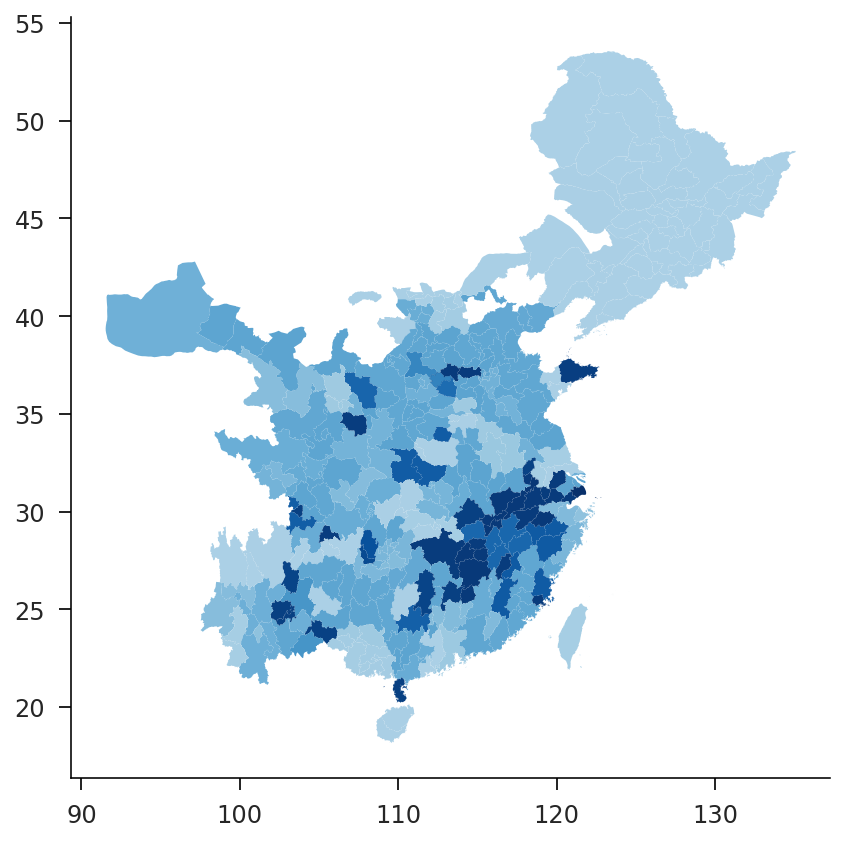

In [133]:
pref_1911 = pref_hist.query('beg_yr < 1911 and end_yr >= 1911')
pref_1911.plot(column='beg_yr', cmap='Blues_r', vmax=2200, figsize=(7, 7));

interactive(children=(IntSlider(value=1900, description='yr', max=1911, min=-224), Output()), _dom_classes=('w…

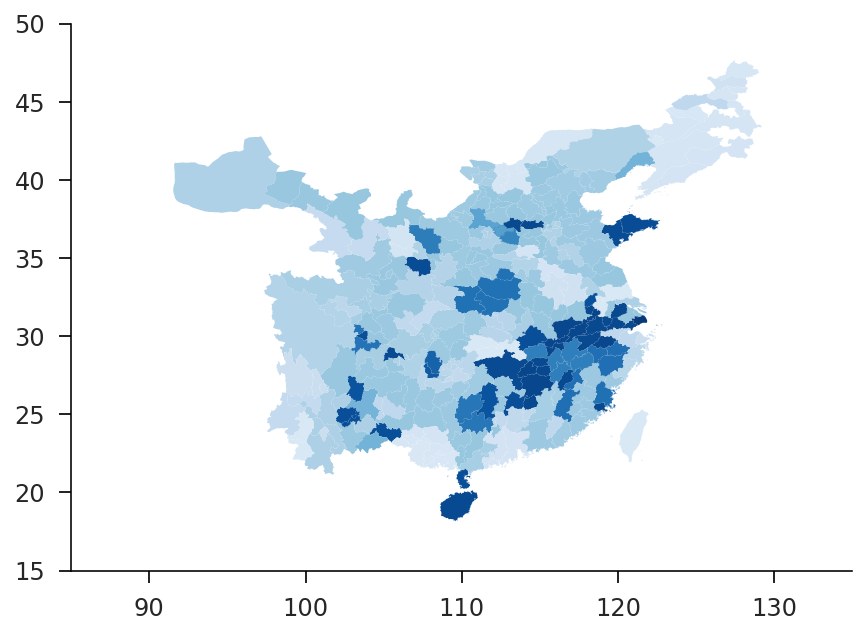

In [134]:
def plot_year(yr):
    df = pref_hist.query(f'beg_yr <= {yr} and end_yr >= {yr}')
    df['age'] = yr - df['beg_yr']
    yrmax = df['age'].max()
    fig, ax = plt.subplots(figsize=(7, 7))
    df.plot(column='age', cmap='Blues', ax=ax, vmin=-100, vmax=600);
    ax.set_xlim(85, 135)
    ax.set_ylim(15, 50)
    ax.set_aspect('equal')
interact(plot_year, yr=IntSlider(min=-224, max=1911, value=1900));

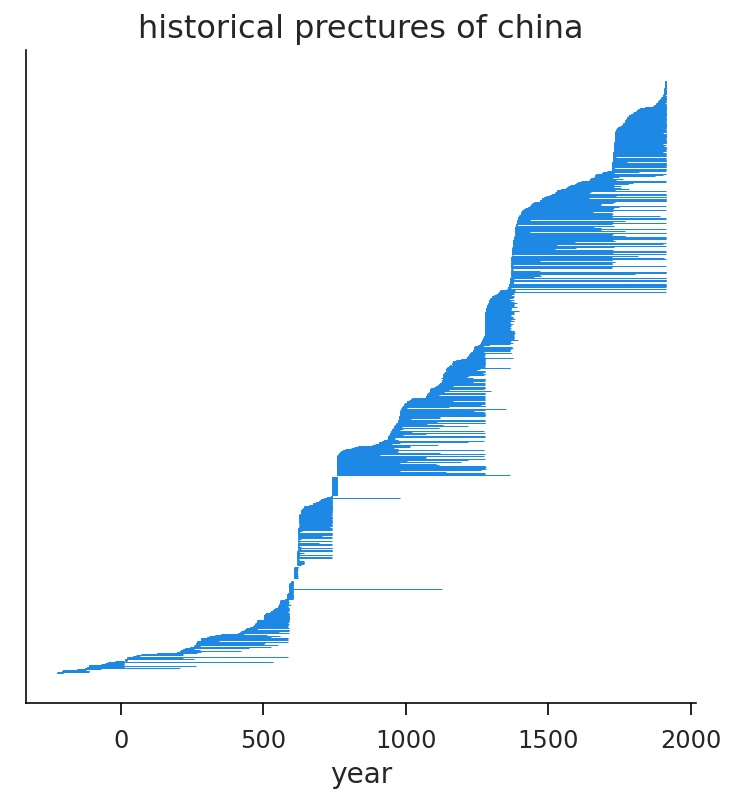

In [135]:
fig, ax = plt.subplots(figsize=(6, 6))
pref_range = pref_hist.sort_values('beg_yr')[['beg_yr', 'end_yr']].set_index(np.arange(len(pref_hist)))
for (i, (b, e)) in pref_range.iterrows():
    ax.hlines(i, b, e, linewidth=0.5)
ax.yaxis.set_visible(False);
ax.set_xlabel('year');
ax.set_title('historical prectures of china');

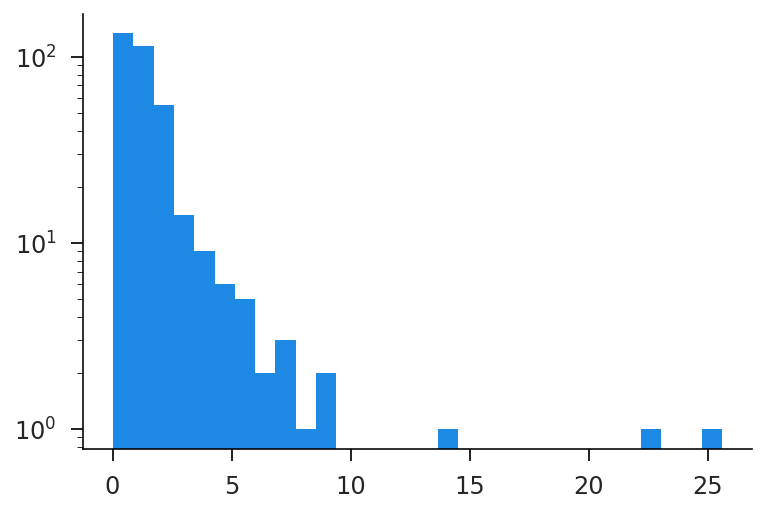

In [136]:
pref_hist.query('end_yr == 1911').area.hist(log=True, bins=30, grid=False);

### Advanced

In [137]:
year = 1776
pref_old = pref_hist.query(f'beg_yr <= {year} and end_yr >= {year}')
pref_old = pref_old[pref_old.is_valid]
pref_old.head()

,name_zh,name_en,beg_yr,end_yr,geometry
2,霍州,Huo Zhou,1772,1911,"MULTIPOLYGON (((111.85910 36.44626, 111.86777 ..."
184,郧阳府,Yunyang Fu,1476,1911,"POLYGON ((110.91881 31.66655, 110.90642 31.662..."
185,襄阳府,Xiangyang Fu,1476,1911,"POLYGON ((112.65113 31.66701, 112.65419 31.657..."
186,德安府,De'an Fu,1729,1911,"POLYGON ((113.91801 31.39151, 113.91645 31.384..."
187,汉阳府,Hanyang Fu,1763,1911,"POLYGON ((114.35085 30.68763, 114.35251 30.686..."


In [138]:
pref_new = gpd.read_file('/media/totoro/data/china_maps/modern/CHN_adm2.shp')
pref_new = pref_new.rename(columns={
    'NL_NAME_2': 'name_zh',
    'VARNAME_2': 'name_en',
})[['name_zh', 'name_en', 'geometry']]
pref_new.head()

,name_zh,name_en,geometry
0,安庆市,Ānqìng,"POLYGON ((117.11557 31.16616, 117.11788 31.160..."
1,蚌埠市,Bèngbù,"POLYGON ((117.26205 33.49959, 117.28395 33.497..."
2,亳州市,Bózhōu,"POLYGON ((115.73950 34.07428, 115.74284 34.072..."
3,巢湖市,Cháohú,"POLYGON ((118.36978 31.92897, 118.37383 31.924..."
4,池州市,Chízhōu,"POLYGON ((117.97800 30.82234, 117.97175 30.816..."


In [139]:
# choose a random modern prefecture
pref_samp = pref_new.query('name_zh == "成都市"')
name_zh, name_en = pref_samp.iloc[0][['name_zh', 'name_en']]
print(name_zh, name_en)

成都市 Chéngdū


In [140]:
# efficiently find the intersection with old provinces
xmin, ymin, xmax, ymax = pref_samp.iloc[[0]].total_bounds
old_subset = pref_old.cx[xmin:xmax, ymin:ymax]
print(len(old_subset))
inter = gpd.overlay(old_subset[['name_en', 'name_zh', 'geometry']], pref_samp, how='intersection')
print(inter[['name_en_1', 'name_zh_1']].drop_duplicates())

9
      name_en_1 name_zh_1
0       Zi Zhou        资州
1    Chengdu Lu       成都府
2  Tongchuan Fu       潼川府
3      Mei Zhou        眉州
4    Qiong Zhou        邛州
5      Mao Zhou        茂州
6     Yazhou Fu       雅州府


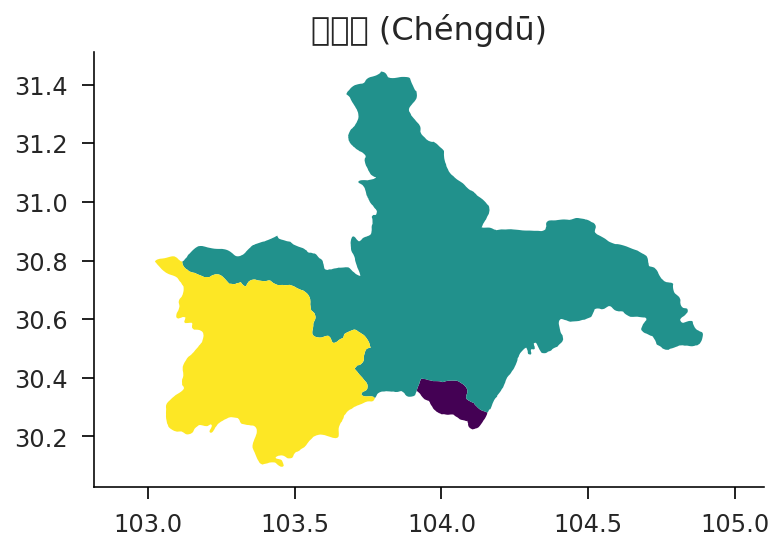

In [141]:
inter1 = inter[inter.area>0.001]
inter1['index'] = np.arange(len(inter1))
inter1.plot(column='index', cmap='viridis');
plt.title(f'{name_zh} ({name_en})');
plt.axis('equal');